# Supermarket store branches sales analysis

Importing Libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

Uploading the data

In [21]:
df=pd.read_csv('Stores.csv')
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620




Flow chart for insights

  *  First Column is ID which have no use, So we will drop it
  *  Store area ,we can use this data to find the co-Relation between store area and sales
  *  Item availabe will have a relation with sales so we have to keep it
  * Daily Customers can give us insights of avg customers speding

Which these columns we can find their relation with sales We can also find what area of a store that is perfect to maximaize sales


# Step 2 : Data Cleaning


   * df.isnull( ).sum( ): It will give you total NULL values in each columns
   * df.info( ): This is very useful,This will give you all information like ' Non-Null Values' & 'Data Type' for each colum
   * df.unique( ): Gives you all unique values of a function


In [22]:
df.isnull( ).sum( )

Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


# Cleaning each column one by one

In [23]:
# For Store area
df.Store_Area.unique()

array([1659, 1461, 1340, 1451, 1770, 1442, 1542, 1261, 1090, 1030, 1187,
       1751, 1746, 1615, 1469, 1644, 1578, 1703, 1438, 1940, 1421, 1458,
       1719, 1449, 1234, 1732, 1475, 1390, 1642, 1715, 1439, 1250, 1331,
       1784, 1375, 1871, 1174, 1839, 1270, 1435,  965, 1665, 1780, 1009,
       1227, 1769, 1660, 1472, 1408, 1514, 1565, 1074, 1864, 1570, 1417,
       1734, 1470, 1761, 1756, 1704, 2011, 1310, 1544, 1707, 1881, 1416,
       1631, 1318, 1692, 1152,  891, 1468, 1539, 1635, 1267, 1720, 1462,
       1431, 1441, 1572, 1287, 1931, 1252, 1238, 1479, 1590, 2169, 1838,
       1385, 1921, 1975, 1853, 1816, 1785, 1579, 1096, 1919, 1262, 1374,
       1309, 1207, 1929, 1573, 1415, 1162, 1485, 1897, 1607, 1909, 1274,
       1157, 1712, 1500, 1682, 1525, 1947, 1164, 1787, 1718, 1365, 1368,
       1342, 1076, 1396, 1713, 1370, 1667, 1638, 1581, 1795, 1179, 1978,
       1688, 1214, 1504, 1498, 1229, 1936, 1369, 1662, 1548, 1649, 1393,
       1450, 1613,  775, 1275, 1740, 1372, 1414, 20



TO remove NULL values we use df.fillna() & Dropna()

    fillna(): Fill the NUll values, we can fill the null values with different values
        df.Sales.fillna(value=df.sales.mean(),inplace=True) : This will fill the Null values with avg salary
        df.Sales.fillna(value='ffill',inplace=True) : This will fill the NULL value with the next value present in the Dataset
        df.Sales.fillna(value='bfill', inplace= True) : This will fill the NULL value with the previous value present in the Dataset ( usefull in data like temperature of the day)

    dropna(): Drop all the rows having null values
        df.Sales.dropna(inplace=True): only use this if you can't use fillna option.. ( Inplace= True means origal dataset will change)



# Step-3: Data Visualization

In [24]:
df.columns

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

<AxesSubplot:xlabel='Items_Available', ylabel='Store_Area'>

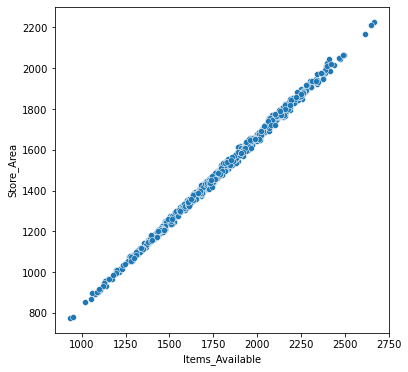

In [25]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='Items_Available', y="Store_Area", data=df)

From the above relation we can see that Store area is directly proptional to Item avialable.

# To Plot multiple graph at once we use pairplot

<Figure size 432x432 with 0 Axes>

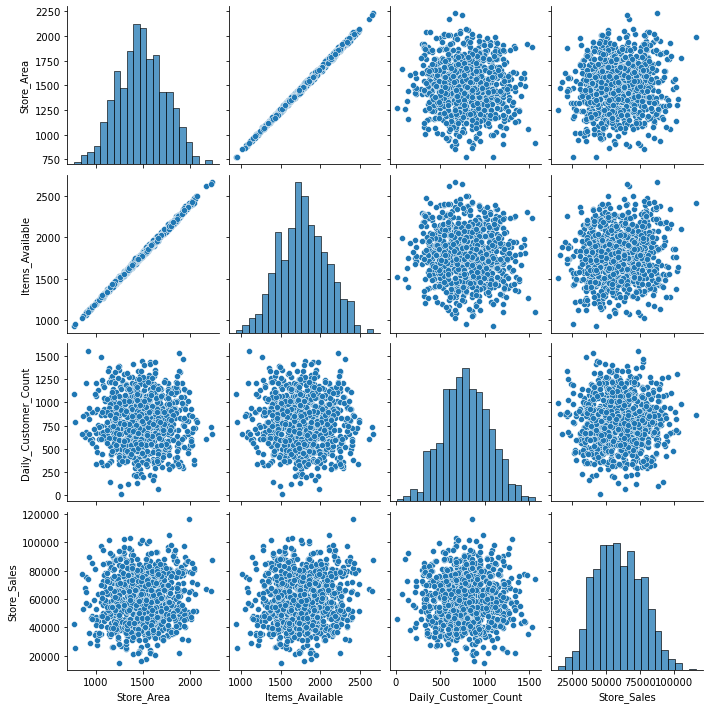

In [26]:
df1=df
df1.drop(['Store ID '], axis=1,inplace=True)
plt.figure(figsize=(6,6))
sns.pairplot(df1)

From the above graphs we can tell that there is no direct relation between any other Parameter


# For the Outliers we use Boxplot


<AxesSubplot:xlabel='Store_Sales'>

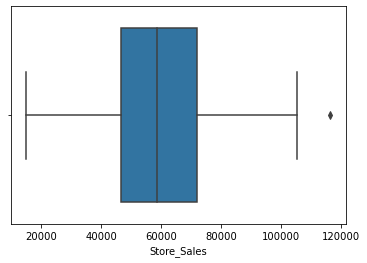

In [27]:
sns.boxplot(x=df1.Store_Sales)

# Plotting multiple graph together

In [31]:
# Create a list for all columns
int_cols = ['Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales']

# Define a functon to plot a graph
def data_outliers(x,fig):
    # subplot is used to plot multiple graph
    plt.subplot(2,2,fig)
    # title of the graph
    plt.title('Outliers of ' + x)
    # plot the graph
    sns.boxplot(x=df[x], palette=("Wistia"))
    plt.xticks(rotation= 90)
    
plt.figure(figsize=(12,6))

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

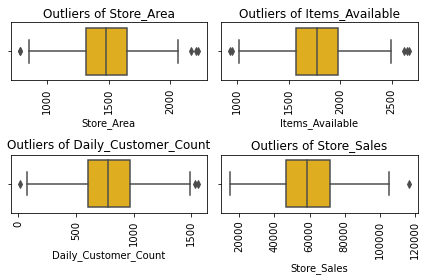

In [32]:
# call the funtion for each column
for e, i in enumerate(int_cols):
    data_outliers(i,e+1)

plt.tight_layout()
plt.show();